# Analyse trained models

In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import pytorch_lightning as pl
import os
import sys
sys.path.append("../")
import numpy as np 
import random
import math
import json
from copy import copy
from glob import glob
from statistics import mean, stdev

## Imports for plotting
import matplotlib.pyplot as plt
plt.set_cmap('cividis')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()

In [2]:
from DAG_matrix.graph_discovery import GraphDiscoveryMatrix
from causal_graphs.graph_definition import CausalDAG

## Visualize training plots

In [36]:
# BASE_PATH = 'checkpoints/GD_1000_7601573_5/'
# BASE_PATH = 'checkpoints/GD_1000_7595997/'
# BASE_PATH = 'checkpoints/GD_1000_7604813_6/'
BASE_PATH = 'checkpoints/GD_1000_7609312_5/'

In [37]:
file = BASE_PATH + 'metrics_full_log_1_GraphDiscoveryMatrix.json'
with open(file, "r") as f:
    results = json.load(f)

In [38]:
results

[{'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.0, 'precision': 0.0},
 {'recall': 0.966, 'precision': 0.9843999999999999},
 {'recall': 0.9703, 'precision': 0.9937},
 {'recall': 0.9729000000000001, 'precision': 0.9958},
 {'recall': 0.9742000000000001, 'precision': 0.9974},
 {'recall': 0.976, 'precision': 0.9984000000000001},
 {'recall': 0.9788, 'precision': 0.9992},
 {'recall': 0.9808, 'precision': 0.9997},
 {'recall': 0.9831, 'precision': 0.9997},
 {'recall': 0.9849, 'precision': 1.0},
 {'recall': 0.9859, 'precision': 1.0},
 {'recall': 0.9864, 'precision': 1.0},
 {'recall': 0.9864, 'precision': 1.0},
 {'recall': 0.9875, 'precision': 1.0}]

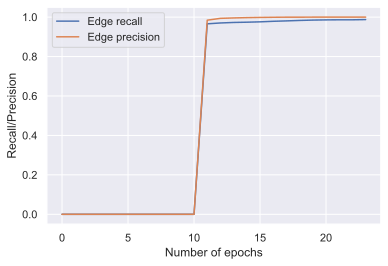

In [39]:
sns.set()
plt.plot(range(1+len(results)), [0] + [r['recall'] for r in results], label='Edge recall')
plt.plot(range(1+len(results)), [0] + [r['precision'] for r in results], label='Edge precision')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Recall/Precision')
plt.savefig('recall_precision_pretraining.pdf')

In [25]:
with open('checkpoints/slurm_GraphDiscovery_1000_7609312_5.out', 'r') as f:
    slurm_file = f.readlines()

In [26]:
slurm_file = [l for l in slurm_file if l.startswith('Gamma')]
recall = [float(l.split("%,")[0].split("Recall: ")[-1])/100 for l in slurm_file]
precision = [float(l.split("% ")[0].split("Precision: ")[-1])/100 for l in slurm_file]
result_dict = [{'recall':r, 'precision': p} for r,p in zip(recall, precision)]
with open('checkpoints/GD_1000_7609312_5/metrics_full_log_1_GraphDiscoveryMatrix.json', 'w') as f:
    json.dump(result_dict, f)